# Fit the LBA on individual data

In [1]:
import pandas as pd

from rlssm.utility.load_data import load_example_dataset
from rlssm.model.models_LBA import LBAModel_2A

## Import individual data

In [2]:
# import some example data:
data = load_example_dataset(hierarchical_levels = 1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,8,1,1,34,37,2,1,1,2.227985,1
1,8,1,2,41,35,2,1,2,2.215362,1
2,8,1,3,51,51,4,3,1,1.574919,0
3,8,1,4,55,43,4,3,2,1.971866,0
4,8,1,5,53,48,4,2,3,1.645202,1


## Initialize the model

In [3]:
model = LBAModel_2A(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_warmup = 500
n_sampling = 500
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

21:28:49 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
k_priors {'mu': 1, 'sd': 1}
sp_trial_var_priors {'mu': 0.3, 'sd': 1}
ndt_priors {'mu': 0, 'sd': 1}
drift_variability_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

21:28:59 - cmdstanpy - INFO - CmdStan done processing.
21:28:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: Exception: Exception: Phi: x is -nan, but must be not nan! (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.stan', line 15, column 10 to column 36) (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.stan', line 66, column 22 to column 79) (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.stan', line 161, column 5 to column 89)
Consider re-running with show_console=True if the above output is unclear!



Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 200 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 200 iterations ended with a divergence (0.0%)


### Get rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,0.994662,lp__
k,0.999749,k
sp_trial_var,0.995242,sp_trial_var
ndt,1.000360,ndt
drift_cor,1.002250,drift_cor
...,...,...
log_lik[236],0.995721,log_lik[236]
log_lik[237],1.002160,log_lik[237]
log_lik[238],1.018600,log_lik[238]


### Get WAIC

In [7]:
model_fit.waic

{'lppd': -293.4409747545237,
 'p_waic': 4.034484588694106,
 'waic': 594.9509186864357,
 'waic_se': 29.169579438947245}

### Save results

In [8]:
model_fit.to_pickle()

Saving file as: /home/andrei/PycharmProjects/rlssm/docs/notebooks/LBA_2A.pkl


## Posteriors

In [9]:
model_fit.samples.describe()

,transf_k,transf_sp_trial_var,transf_ndt,transf_drift_cor,transf_drift_inc,transf_drift_variability
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.981128,2.303016,0.334913,1.536058,0.785526,0.388114
std,0.389007,0.654661,0.122335,0.445541,0.232079,0.153802
min,0.242467,1.027680,0.022624,0.589525,0.324766,0.105544
25%,0.691126,1.843950,0.252483,1.221008,0.633574,0.260955
50%,0.929032,2.219535,0.329740,1.505325,0.764496,0.365931
75%,1.175807,2.749895,0.412771,1.851517,0.937042,0.471753
max,2.684770,4.633990,0.600674,2.889130,1.505270,0.978123


In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

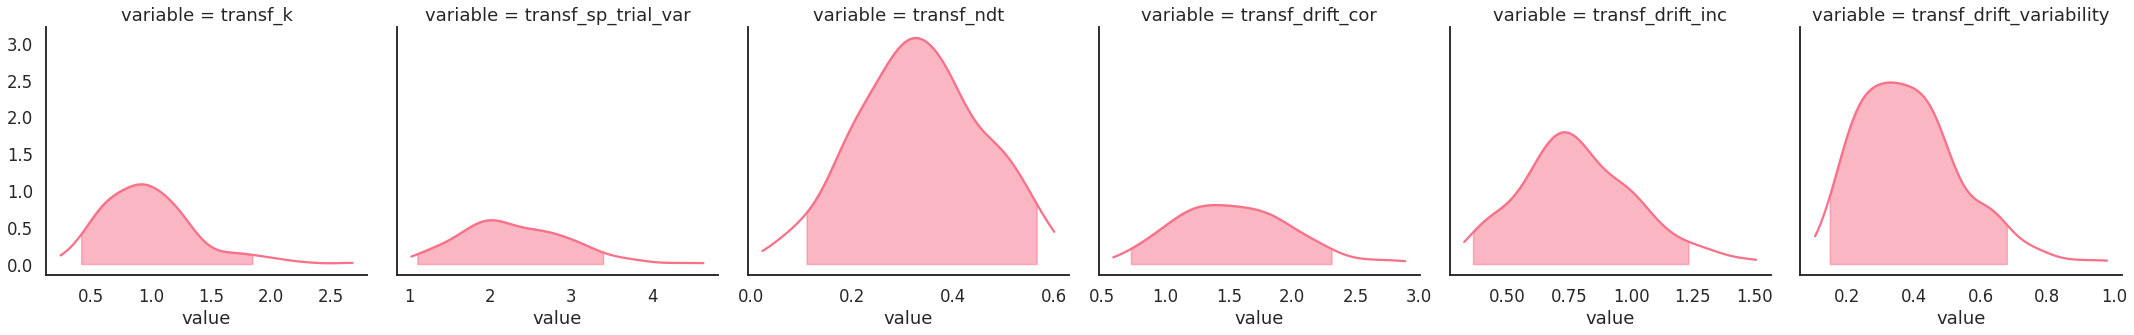

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [12]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         2.029261  1.808256  1.556345  2.102756  1.331900  2.163528   
2         1.973825  1.115453  1.690249  1.132434  1.679348  1.080339   
3         2.349157  1.613064  1.194248  1.539368  1.759817  1.675937   
4         1.804470  1.151098  1.848400  2.544139  1.358736  2.548861   
5         1.519131  1.617832  1.544380  2.603848  1.459317  2.368666   
...            ...       ...       ...       ...       ...       ...   
96        1.685378  1.584287  1.716348  1.630277  2.274046  1.600699   
97        1.880821  1.390182  1.626615  1.410957  1.299396  1.900158   
98        1.010571  1.301204  2.309500  1.363201  1.651395  1.808459   
99        1.606995  1.855814  2.423367  2.466196  2.329941  2.030376   
100       1.190649  2.591949  2.002174  2.049808  1.398978  1.792969   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.390043  1.668636  1.105082  2.381951  ...      1.0  1.0  1.0  1.0   
2         1.105588  2.304161  1.526415  1.719803  ...      1.0  1.0  0.0  1.0   
3         1.877739  0.953262  2.090849  1.816779  ...      1.0  1.0  1.0  0.0   
4         2.706643  2.289578  1.902888  2.616008  ...      1.0  1.0  1.0  1.0   
5         1.735584  2.282681  1.413290  2.210798  ...      1.0  1.0  0.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        2.086506  2.144286  1.082942  1.584928  ...      1.0  1.0  1.0  0.0   
97        1.403598  2.124632  1.510357  1.828149  ...      1.0  1.0  1.0  1.0   
98        2.142530  2.058577  1.860459  1.147656  ...      1.0  1.0  1.0  1.0   
99        2.323058  1.462224  2.113690  2.451277  ...      1.0  1.0  1.0  1.0   
100       1.310466  2.309201  1.832668  1.211935  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         0.0  1.0  1.0  1.0  0.0  1.0  
2         1.0  0.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  0.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        0.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  0.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       0.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [13]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.812500,1.778017,0.226911,1.537175,1.666323,1.828917,2.083486,2.318932,1.157308,1.395754,1.700233,2.015735,2.522016
2,0.912500,1.628672,0.092567,1.711530,1.777405,1.813898,1.913581,2.113820,1.121702,1.326895,1.574755,1.851754,2.151084
3,0.833333,1.714963,0.094980,1.555188,1.797911,1.946380,2.086447,2.283418,1.036355,1.271066,1.646153,1.957122,2.447155
4,0.858333,1.788590,0.166925,1.561561,1.646001,1.762105,1.971720,2.352569,1.140698,1.405313,1.728082,2.075529,2.450368
5,0.837500,1.669592,0.271806,1.417499,1.516992,1.696711,1.927478,2.262661,1.001785,1.226331,1.531691,2.032756,2.416470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.829167,1.794523,0.146684,1.490061,1.604874,1.856526,2.019533,2.245899,1.130258,1.393832,1.709514,2.188066,2.510255
97,0.904167,1.658348,0.219886,1.475031,1.525862,1.712347,1.885861,2.050022,1.052129,1.331065,1.590924,1.920814,2.321681
98,0.945833,1.698724,-0.039396,1.737521,1.777940,1.903312,1.999197,2.203180,1.127301,1.421833,1.653854,1.990169,2.226105


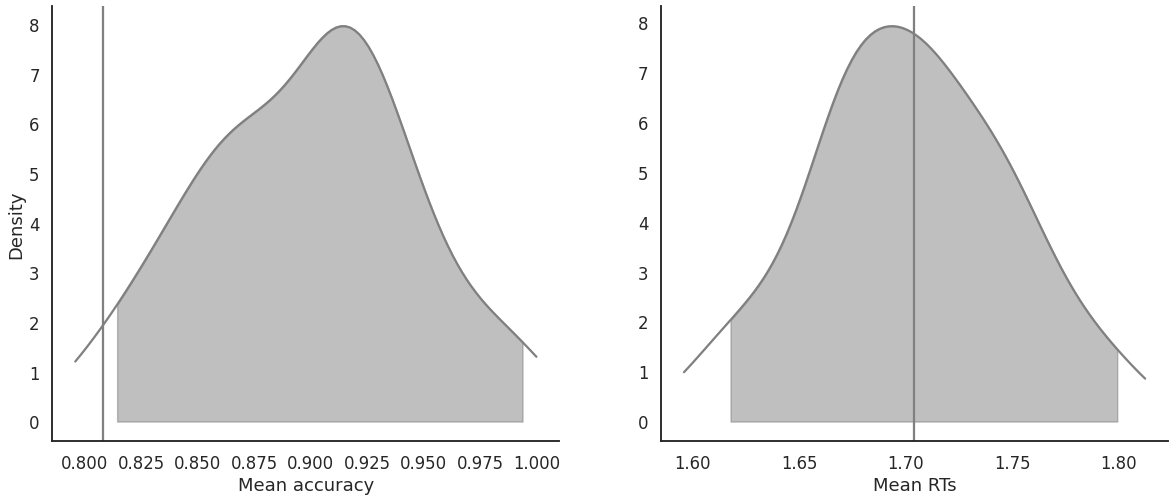

In [14]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

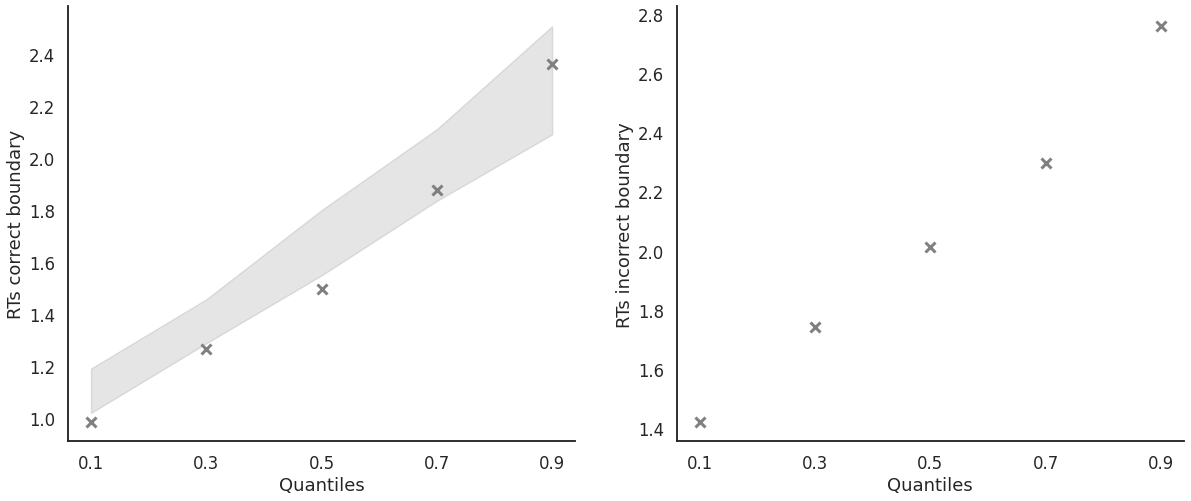

In [15]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [16]:
import numpy as np

In [17]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  1.858046  0.014237   
                        2                1.00  1.588697 -0.298470   
                        3                0.85  1.663290 -0.040115   
                        4                0.90  1.821929  0.252245   
                        5                0.80  1.884718 -0.156686   
...                                       ...       ...       ...   
3           CD          96               0.90  1.626622  0.919349   
                        97               0.95  1.685841  0.113055   
                        98               0.85  1.864700 -0.768123   
                        99               1.00  1.867642 -0.020887   
                        100              0.90  1.832565 -0.227538   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.615752             1.621036   
                        2                         NaN             1.400080   
                        3                    1.812747             1.305453   
                        4                    1.608440             1.473543   
                        5                    1.498391             1.591480   
...                                               ...                  ...   
3           CD          96                   1.869870             1.227271   
                        97                   1.616095             1.400222   
                        98                   1.962470             1.725154   
                        99                        NaN             1.671820   
                        100                  2.019832             1.306330   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.651651             1.756108   
                        2                         NaN             1.622870   
                        3                    2.020403             1.734899   
                        4                    1.654786             1.707139   
                        5                    1.527048             2.037240   
...                                               ...                  ...   
3           CD          96                   2.113327             1.384943   
                        97                   1.616095             1.601419   
                        98                   2.096673             1.939170   
                        99                        NaN             1.841866   
                        100                  2.072248             1.895687   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.894324             2.298132  
                        2                         NaN             1.819298  
                        3                    2.120648             1.806068  
                        4                    1.701131             2.258949  
                        5                    1.636667             2.301813  
...                                               ...                  ...  
3           CD          96                   2.356784             1.611743  
                        97                   1.616095             1.969339  
                        98                   2.160937             2.057294  
                        99                        NaN             2.152963  
                        100                  2.124664             2.281497  

[1200 rows x 9 columns]

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.833333  1.696509  0.524297               1.898511   
           2            0.966667  1.636104  0.249819               1.970952   
           3            0.800000  1.846221 -0.258254               1.799307   
           4            0.766667  1.735330  0.217493               1.873010   
           5            0.900000  1.806248 -0.003384               1.752244   
...                          ...       ...       ...                    ...   
8          96           0.866667  1.828833  0.296993               1.552798   
           97           0.966667  1.720905  0.053225               1.478955   
           98           0.966667  1.559318  0.120146               2.001299   
           99           0.866667  1.615664  0.492003               1.807269   
           100          0.933333  1.745804  0.102290               1.877978   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.335963               1.905241   
           2                  1.372037               1.970952   
           3                  1.470774               1.972847   
           4                  1.335889               2.056703   
           5                  1.495859               1.828387   
...                                ...                    ...   
8          96                 1.470144               1.651732   
           97                 1.440777               1.478955   
           98                 1.348922               2.001299   
           99                 1.273250               1.884637   
           100                1.436196               1.980488   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.625220               2.156945   
           2                  1.573532               1.970952   
           3                  1.873893               2.123628   
           4                  1.655267               2.121693   
           5                  1.765496               1.989599   
...                                ...                    ...   
8          96                 1.754698               1.817685   
           97                 1.681540               1.478955   
           98                 1.494261               2.001299   
           99                 1.446274               1.975245   
           100                1.706807               2.082998   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.701998  
           2                  1.842414  
           3                  2.066299  
           4                  1.904689  
           5                  2.152307  
...                                ...  
8          96                 2.084572  
           97                 2.130711  
           98                 1.716168  
           99                 1.752329  
           100                1.972275  

[800 rows x 9 columns]

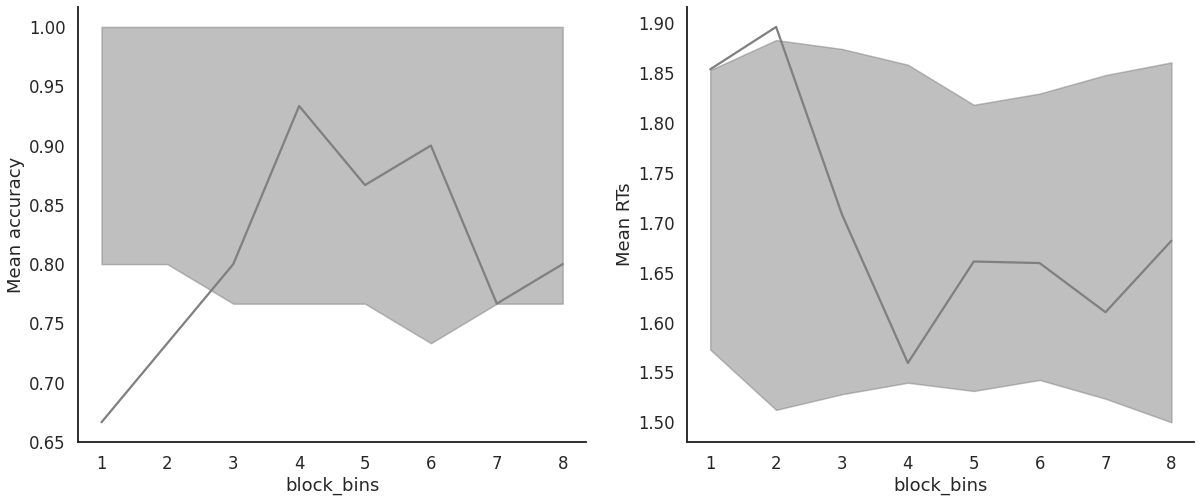

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

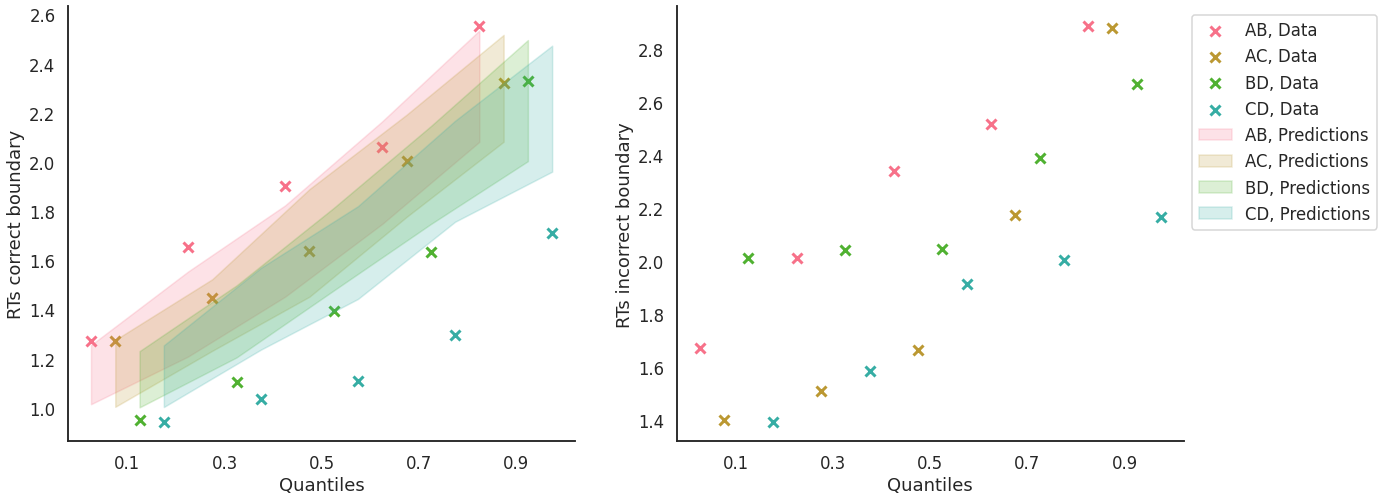

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);